In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

# Hàm đánh giá hiệu năng
def evaluate_hyperparameters(params):
    C, gamma = params  # Các siêu tham số
    if C <= 0 or gamma <= 0:  # Ràng buộc không hợp lệ
        return -np.inf  # Trả về giá trị rất thấp
    model = SVC(C=C, gamma=gamma)
    scores = cross_val_score(model, X, y, cv=5, scoring="accuracy")
    return scores.mean()  # Trả về độ chính xác trung bình

def evolution_strategy_theoretical(objective_function, dim, population_size, sigma, alpha, max_iters, early_stop_threshold=None):
    ψ_mean = np.random.uniform(0.1, 10, dim)  # Khởi tạo giá trị trung bình
    ψ_std = np.full(dim, sigma)  # Khởi tạo phương sai
    best_score = -np.inf
    best_params = None
    history_scores = []  # Lưu lại các giá trị độ chính xác qua từng vòng lặp
    history_params = []  # Lưu lại các giá trị tham số tốt nhất qua từng vòng lặp
    
    for iteration in range(max_iters):
        # Sinh mẫu từ phân phối Gaussian
        population = np.random.normal(ψ_mean, ψ_std, (population_size, dim))
        scores = np.array([objective_function(ind) for ind in population])
        
        # Xếp hạng và gán trọng số
        ranks = np.argsort(scores)[::-1]
        weights = np.maximum(0, np.log(population_size / 2 + 1) - np.log(np.arange(1, population_size + 1)))
        weights /= np.sum(weights)
        weights -= 1 / population_size

        # Tính gradient log-likelihood và cập nhật mean
        gradients = np.zeros(dim)
        for i in range(population_size):
            gradients += weights[i] * ((population[i] - ψ_mean) / ψ_std**2)
        ψ_mean += alpha * gradients
        
        # Cập nhật std để giữ phân phối ổn định
        ψ_std = np.maximum(0.01, ψ_std + alpha * np.std(population, axis=0))

        # Lưu lại giá trị độ chính xác và tham số tốt nhất
        history_scores.append(scores[ranks[0]])
        history_params.append(population[ranks[0]])

        # Kiểm tra điều kiện dừng sớm
        if scores[ranks[0]] > best_score:
            best_score = scores[ranks[0]]
            best_params = population[ranks[0]]
        if early_stop_threshold and best_score >= early_stop_threshold:
            print(f"Early stopping at iteration {iteration + 1}")
            break
        
        # Logging
        print(f"Iteration {iteration + 1}, Best Score: {best_score}, Best Params: {best_params}")
    
    # Vẽ biểu đồ độ chính xác qua các vòng lặp
    plt.figure(figsize=(10, 6))
    plt.plot(history_scores, label="Best Score")
    plt.xlabel("Iteration")
    plt.ylabel("Accuracy Score")
    plt.title("Optimization Progress (Best Score per Iteration)")
    plt.grid(True)
    plt.legend()
    plt.show()

    return best_params, best_score


Iteration 1, Best Score: 0.586, Best Params: [7.06935062 1.09275555]
Iteration 2, Best Score: 0.586, Best Params: [7.06935062 1.09275555]
Iteration 3, Best Score: 0.586, Best Params: [7.06935062 1.09275555]
Iteration 4, Best Score: 0.596, Best Params: [7.21539656 1.05046105]
Iteration 5, Best Score: 0.637, Best Params: [7.47472787 0.78953069]
Iteration 6, Best Score: 0.8109999999999999, Best Params: [6.27498822 0.26740015]
Iteration 7, Best Score: 0.8109999999999999, Best Params: [6.27498822 0.26740015]
Iteration 8, Best Score: 0.8109999999999999, Best Params: [6.27498822 0.26740015]
Iteration 9, Best Score: 0.8109999999999999, Best Params: [6.27498822 0.26740015]
Iteration 10, Best Score: 0.8109999999999999, Best Params: [6.27498822 0.26740015]
Iteration 11, Best Score: 0.836, Best Params: [4.80868579 0.09791633]
Iteration 12, Best Score: 0.841, Best Params: [6.02082436 0.12502851]
Iteration 13, Best Score: 0.841, Best Params: [6.02082436 0.12502851]
Iteration 14, Best Score: 0.853999

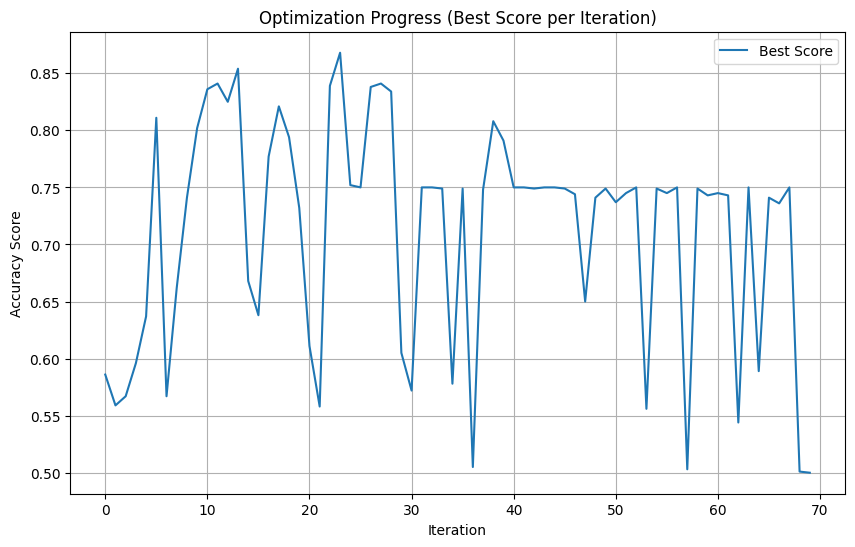

Best Parameters: [1.36566550e+01 5.44019582e-03], Best Score: 0.868


In [5]:
# Tạo dataset mẫu
X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# Cấu hình Evolution Strategies
dim = 2  # Tối ưu hóa 2 siêu tham số: C và gamma
population_size = 20
sigma = 0.5
alpha = 0.1
max_iters = 70
early_stop_threshold = 0.95  # Dừng sớm nếu đạt độ chính xác >= 95%

# Tối ưu hóa
best_params, best_score = evolution_strategy_theoretical(
    objective_function=evaluate_hyperparameters,
    dim=dim,
    population_size=population_size,
    sigma=sigma,
    alpha=alpha,
    max_iters=max_iters,
    early_stop_threshold=early_stop_threshold
)

print(f"Best Parameters: {best_params}, Best Score: {best_score}")